<a href="https://colab.research.google.com/github/sainikhilrai/Deep-Learning/blob/master/basicNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [2]:
import keras

Using TensorFlow backend.


In [3]:
import tensorflow as tf

tf.__version__

'1.13.1'

In [4]:
import theano as th
th.__version__

'1.0.4'

In [0]:
# OM SRI SAI RAM

# Descr: Basic or experiment code to perform loss reserve prediction

##############################
# Step 1 : Reading Sample Data
##############################

import numpy as np
import random
import sklearn
import os

from sklearn.preprocessing import LabelEncoder

os.environ["KERAS_BACKEND"] = "theano"
np.random.seed(7)
random.seed(7)
accident_years = np.arange(2005,2013,1)
development_years = np.arange(0,8,1)
triangle = np.array(([1232,946,520,722,316,165,48,14],
                   [1469,1201,708,845, 461,235,56,18],
                   [1652,1416,959,954,605,287,69,21],
                   [1831,1634,1124,1087,725,314,79,24],
                   [2074,1919,1330,1240,756,359,91,28],
                   [2434,2263,1661,1540,909,432,109,33],
                   [2810,2108,1544,1565,924,439,111,34],
                   [3072,2614,1785,1810,1069,508,128,39]))


In [7]:
type(triangle)

numpy.ndarray

In [8]:
print(' Accident Years',accident_years)
print(' Developement Years',development_years)
print(' Input', triangle)


 Accident Years [2005 2006 2007 2008 2009 2010 2011 2012]
 Developement Years [0 1 2 3 4 5 6 7]
 Input [[1232  946  520  722  316  165   48   14]
 [1469 1201  708  845  461  235   56   18]
 [1652 1416  959  954  605  287   69   21]
 [1831 1634 1124 1087  725  314   79   24]
 [2074 1919 1330 1240  756  359   91   28]
 [2434 2263 1661 1540  909  432  109   33]
 [2810 2108 1544 1565  924  439  111   34]
 [3072 2614 1785 1810 1069  508  128   39]]


In [9]:
# Cum calc
C = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]):
        C[i,j] = sum(triangle[i,:j+1])

print('C',C)

C [[ 1232.  2178.  2698.  3420.  3736.  3901.  3949.  3963.]
 [ 1469.  2670.  3378.  4223.  4684.  4919.  4975.  4993.]
 [ 1652.  3068.  4027.  4981.  5586.  5873.  5942.  5963.]
 [ 1831.  3465.  4589.  5676.  6401.  6715.  6794.  6818.]
 [ 2074.  3993.  5323.  6563.  7319.  7678.  7769.  7797.]
 [ 2434.  4697.  6358.  7898.  8807.  9239.  9348.  9381.]
 [ 2810.  4918.  6462.  8027.  8951.  9390.  9501.  9535.]
 [ 3072.  5686.  7471.  9281. 10350. 10858. 10986. 11025.]]


In [10]:
l_encode = LabelEncoder()
l_encode.fit(accident_years)
a_yr = l_encode.transform(accident_years)
l_encode.fit(development_years)
dev_yr = l_encode.transform(development_years)

print(a_yr)
print(dev_yr)


[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


In [0]:
train_data = []
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        train_data.append([a_yr[i],dev_yr[j],C[i,j]])
        
test_data = []
for i in range(1,np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i,np.shape(triangle)[1]):
        test_data.append([a_yr[i],dev_yr[j],C[i,j]])


In [21]:
type(train_data)
train_data = np.array(train_data)
type(train_data)
print(' Train Data',train_data)
train_data.shape

type(test_data)
test_data = np.array(test_data)
type(test_data)
print(' Test Data',test_data)
test_data.shape

 Train Data [[0.000e+00 0.000e+00 1.232e+03]
 [0.000e+00 1.000e+00 2.178e+03]
 [0.000e+00 2.000e+00 2.698e+03]
 [0.000e+00 3.000e+00 3.420e+03]
 [0.000e+00 4.000e+00 3.736e+03]
 [0.000e+00 5.000e+00 3.901e+03]
 [0.000e+00 6.000e+00 3.949e+03]
 [0.000e+00 7.000e+00 3.963e+03]
 [1.000e+00 0.000e+00 1.469e+03]
 [1.000e+00 1.000e+00 2.670e+03]
 [1.000e+00 2.000e+00 3.378e+03]
 [1.000e+00 3.000e+00 4.223e+03]
 [1.000e+00 4.000e+00 4.684e+03]
 [1.000e+00 5.000e+00 4.919e+03]
 [1.000e+00 6.000e+00 4.975e+03]
 [2.000e+00 0.000e+00 1.652e+03]
 [2.000e+00 1.000e+00 3.068e+03]
 [2.000e+00 2.000e+00 4.027e+03]
 [2.000e+00 3.000e+00 4.981e+03]
 [2.000e+00 4.000e+00 5.586e+03]
 [2.000e+00 5.000e+00 5.873e+03]
 [3.000e+00 0.000e+00 1.831e+03]
 [3.000e+00 1.000e+00 3.465e+03]
 [3.000e+00 2.000e+00 4.589e+03]
 [3.000e+00 3.000e+00 5.676e+03]
 [3.000e+00 4.000e+00 6.401e+03]
 [4.000e+00 0.000e+00 2.074e+03]
 [4.000e+00 1.000e+00 3.993e+03]
 [4.000e+00 2.000e+00 5.323e+03]
 [4.000e+00 3.000e+00 6.563e+03

(28, 3)

In [39]:
print(type(train_data))
train_data.shape

<class 'numpy.ndarray'>


(36, 3)

In [0]:
#############################################
# Step 3: Build Model using Neural Networks
#############################################

import keras
import keras.backend as K
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras import optimizers

In [0]:
#define the loss function
def poisson_dev(y_true, y_pred):
    return 2*K.mean(y_pred - y_true -y_true*(K.log(K.clip(y_pred,K.epsilon(),None)) -K.log(K.clip(y_true,K.epsilon(),None))),axis=-1) 


In [37]:
print(type(train_data))


<class 'numpy.ndarray'>


In [0]:
model = Sequential()
ip_dim = 2
#model.add(Dropout(0.1, input_shape=(ip_dim,))
model.add(Dense(ip_dim, input_dim=ip_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation="exponential"))
# Compile model
model.compile(loss=poisson_dev, optimizer='adam',metrics=['accuracy'])


In [0]:
history = model.fit(x=train_data[:,:ip_dim], y=train_data[:,ip_dim], batch_size=1, epochs=500, verbose=1, callbacks=None, validation_split=0.33, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)


In [0]:
x= train_data[:,:ip_dim]
y= train_data[:,ip_dim]

In [47]:
type(x)
x.shape
x[2]
y[2]

2698.0

In [48]:
###########################################
# Step 4: Model Prediction
#############################################
out = model.predict(test_data[:,:2])
print(out)

[[ 5921.562 ]
 [ 6008.455 ]
 [ 6879.707 ]
 [ 6096.623 ]
 [ 6980.6597]
 [ 7992.8857]
 [ 6186.091 ]
 [ 7083.1006]
 [ 8110.1733]
 [ 9284.297 ]
 [ 6276.8594]
 [ 7187.038 ]
 [ 8229.104 ]
 [ 9420.319 ]
 [10783.961 ]
 [ 6368.972 ]
 [ 7292.5005]
 [ 8349.666 ]
 [ 9558.334 ]
 [10941.954 ]
 [12525.873 ]
 [ 6462.4365]
 [ 7399.518 ]
 [ 8471.987 ]
 [ 9698.371 ]
 [11102.263 ]
 [12709.387 ]
 [14549.153 ]]


In [49]:
out.shape

(28, 1)

In [74]:
#################################
# Step 5 : Reserve calculation
#################################

import matplotlib.pyplot as plt
#print(' Test Data',test_data)
#print('pred', model.predict([2,]))
#print('C',C)
true_reserve = 0
for i in range(1,np.shape(triangle)[0]):
    j = np.shape(triangle)[1]-1-i
    #print(i,j)
    #print('last known',C[i,j])
    #print(' last estimate',C[i,np.shape(triangle)[1]-1])
    true_reserve += (C[i,np.shape(triangle)[1]-1] - C[i,j])
    #print(true_reserve)
print(" True reserve",true_reserve)


 True reserve 17352.0


In [75]:
appended= np.array(list(zip(test_data,np.ravel(out))))
len(appended)

out_dict = {}
for i in range(len(appended)):
    #print(tuple(appended[i,0][:2]))
    #print(appended[i,1])
    out_dict[tuple(appended[i,0][:2])] = appended[i,1]



The zipped result is : 

In [0]:
pred_reserve = 0
final_pred = []
actuals = []
for i in range(1,np.shape(triangle)[0]):
    j = int(np.shape(triangle)[1]-1-i)    
    #print(i,j)
    #print('last known',C[i,j])
    #print(' last pred', out_dict[(i,np.shape(triangle)[1]-1)])
    #print(' last estimate',C[i,np.shape(triangle)[1]-1])
    final_pred.append(out_dict[(i,np.shape(triangle)[1]-1)] - C[i,j])
    actuals.append(C[i,np.shape(triangle)[1]-1] - C[i,j])
    pred_reserve += (out_dict[(i,np.shape(triangle)[1]-1)] - C[i,j])

In [78]:
print(" Predicted reserve",pred_reserve)
print(' Bias',pred_reserve - true_reserve)


 Predicted reserve 29777.43896484375
 Bias 12425.43896484375


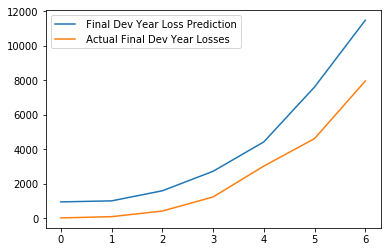

In [79]:
plt.figure()
plt.plot(final_pred, label=" Final Dev Year Loss Prediction")
plt.plot(actuals, label=" Actual Final Dev Year Losses")
plt.legend()

 MAE 964.4139229910714
 Error Sum 7887.2509765625


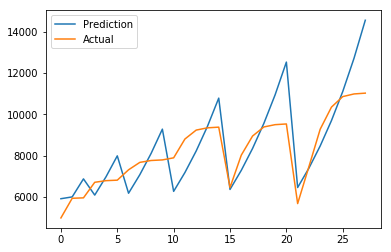

In [80]:
#############################################
# Step 6 : Not required but it is just error/prediction display for other values (accident and devlopment year combo)
#######################################################

from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt

#print(" Pred", np.ravel(out))
#print(" Actual", test_data[:,2])
#print(" Prediction      Actual")
#print(np.array(zip(np.ravel(out),test_data[:,2])))


print(" MAE", mae(np.ravel(out),test_data[:,2]))
error = ([x-y for x,y in zip(np.ravel(out),test_data[:,2])])
print(" Error Sum", sum(error))
plt.figure()
plt.plot(np.ravel(out), label="Prediction")
plt.plot(np.ravel(test_data[:,2]), label="Actual")
plt.legend()
plt.show()
